# Import Library

In [ ]:
#Load Library
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.layers import LeakyReLU
from sklearn.model_selection import GridSearchCV
from keras.constraints import MaxNorm
from tabulate import tabulate
from keras.callbacks import EarlyStopping

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
from sklearn.svm import SVR


In [ ]:
#from google.colab import files
#ploaded = files.upload()

# Load Dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/arvin0711/Kuliah-Predictive-Model-Analytics/main/Jakarta%202015%20-%202022.csv') #, index_col='datetime', parse_dates=['datetime'])
data_original = data.copy()
train_datetime = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')

data.head()

,total_visitor,total_accomodation
datetime,,
1/1/2014,193017,16332
2/1/2014,185851,17101
3/1/2014,204004,17438
4/1/2014,186373,17943
5/1/2014,190716,18123


In [ ]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
data.isna().sum()

total_visitor         0
total_accomodation    0
dtype: int64

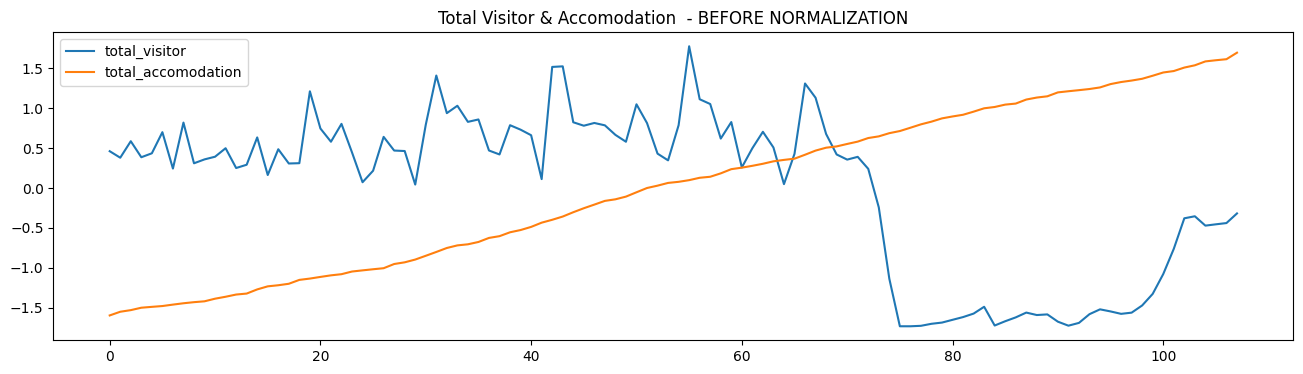

In [ ]:
data.plot(figsize=(16,4),legend=True)
plt.title('Total Visitor & Accomodation  - BEFORE NORMALIZATION')
plt.show()



```
# This is formatted as code
```

### Normalisasi

In [ ]:
"""def normalize_fn(data, columns):
    scaler_object = sklearn.preprocessing.MinMaxScaler()

    for col in columns:
        data[col] = scaler_object.fit_transform(data[col].values.reshape(-1, 1))

    return data
"""


'def normalize_fn(data, columns):\n    scaler_object = sklearn.preprocessing.MinMaxScaler()\n\n    for col in columns:\n        data[col] = scaler_object.fit_transform(data[col].values.reshape(-1, 1))\n\n    return data\n'

# Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_fn(data, columns):
    scaler_object = MinMaxScaler()

    for col in columns:
        data[col] = scaler_object.fit_transform(data[col].values.reshape(-1, 1))

    return data

columns_to_normalize = ['total_visitor', 'total_accomodation']
data_norm = normalize_fn(data, columns_to_normalize)
data_norm

,total_visitor,total_accomodation
0,0.625267,0.000000
1,0.602004,0.014015
2,0.660936,0.020156
3,0.603698,0.029360
4,0.617797,0.032640
...,...,...
103,0.392893,0.951997
104,0.359458,0.966813
105,0.364162,0.971260
106,0.368610,0.975215


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
"""columns_to_normalize = ['total_visitor', 'total_accomodation']
data_norm = normalize_fn(data, columns_to_normalize)
data_norm"""

"columns_to_normalize = ['total_visitor', 'total_accomodation']\ndata_norm = normalize_fn(data, columns_to_normalize)\ndata_norm"

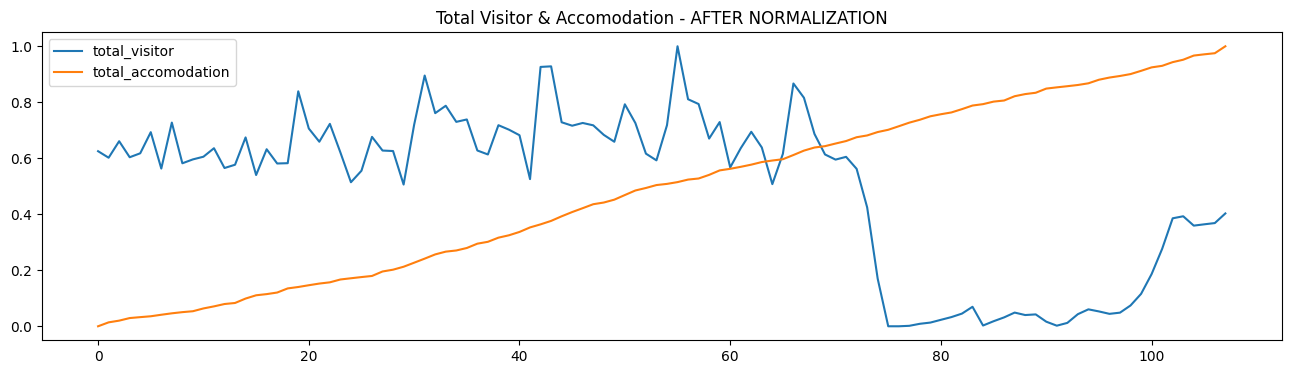

In [ ]:
data_norm.plot(figsize=(16,4),legend=True)
plt.title('Total Visitor & Accomodation - AFTER NORMALIZATION')
plt.show()

# LTSM

# Menetukan features (variabel independen) dan target (variabel dependen)

In [ ]:
X = data_norm.iloc[:, [1]].values
y = data_norm.iloc[:, 0].values

In [ ]:
def data_prep(data, sequence_length):
    X = []
    y = []

    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])

    return np.array(X), np.array(y)

# Skenario 1 - 80:20

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [ ]:
 #Display results
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test),
}

 #Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)


         Length
X_train      86
y_train      86
X_test       22
y_test       22


In [ ]:
# Define sequence length
sequence_length = 12

# Prepare training and testing data
X_train, y_train = data_prep(X_train, sequence_length)
X_test, y_test= data_prep(X_test, sequence_length)

# Reshape the data for the RNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (74, 12, 1)
y_train.shape =  (74, 1)
X_test.shape =  (10, 12, 1)
y_test.shape =  (10, 1)


In [ ]:
# Build the LSTM model
model = Sequential()

# First LSTM layer
model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1))) #

# Second LSTM layer
model.add(LSTM(16, activation='tanh'))



# Output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 16)                9280      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 75857 (296.32 KB)
Trainable params: 75857 (296.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=16, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=12,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping])

Epoch 1/25
5/5 [==============================] - 13s 1s/step - loss: 0.1171 - val_loss: 0.1332
Epoch 2/25
5/5 [==============================] - 0s 80ms/step - loss: 0.0119 - val_loss: 0.0164
Epoch 3/25
5/5 [==============================] - 0s 66ms/step - loss: 0.0157 - val_loss: 0.0014
Epoch 4/25
5/5 [==============================] - 0s 73ms/step - loss: 0.0029 - val_loss: 0.0332
Epoch 5/25
5/5 [==============================] - 0s 66ms/step - loss: 0.0068 - val_loss: 0.0266
Epoch 6/25
5/5 [==============================] - 0s 48ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 7/25
5/5 [==============================] - 0s 60ms/step - loss: 0.0018 - val_loss: 1.7334e-04
Epoch 8/25
5/5 [==============================] - 0s 46ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 9/25
5/5 [==============================] - 0s 65ms/step - loss: 5.0887e-04 - val_loss: 0.0045
Epoch 10/25
5/5 [==============================] - 0s 47ms/step - loss: 6.8252e-04 - val_loss: 0.0016
Epoch 11/25
5/5 [=

In [ ]:
# Extract epoch information
epoch_info = pd.DataFrame({
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})

# Display the epoch information table
print("Epoch Information Table:")
print(epoch_info.to_markdown(index=False))


Epoch Information Table:
|   Epoch |        Loss |   Validation Loss |
|--------:|------------:|------------------:|
|       1 | 0.117088    |       0.133208    |
|       2 | 0.0118943   |       0.0163511   |
|       3 | 0.0157441   |       0.00140281  |
|       4 | 0.00289634  |       0.0332023   |
|       5 | 0.00677576  |       0.0265785   |
|       6 | 0.0028968   |       0.00324114  |
|       7 | 0.00179356  |       0.000173344 |
|       8 | 0.0015629   |       0.00120073  |
|       9 | 0.000508871 |       0.00454178  |
|      10 | 0.000682519 |       0.00162718  |
|      11 | 0.000233796 |       0.00011791  |
|      12 | 0.000309509 |       3.75577e-05 |
|      13 | 0.000170855 |       0.00044578  |
|      14 | 0.000177502 |       0.000126351 |
|      15 | 0.000154036 |       3.91806e-05 |
|      16 | 0.000129773 |       0.000183954 |
|      17 | 0.000131801 |       0.000389402 |
|      18 | 0.000130634 |       0.000134903 |
|      19 | 0.000117824 |       0.000240586 |
|      20

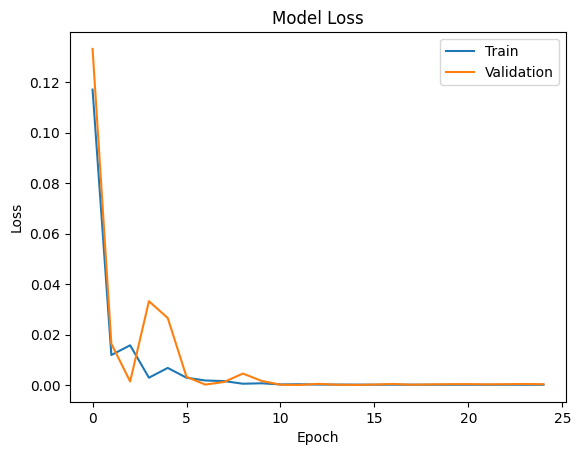

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()

In [ ]:
# Forecasting untuk 12 bulan ke depan
n_past = 1
n_month_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
LSTM_prediction = model.predict(X_train[-n_month_prediction:])
mse = mean_squared_error(y_train[-n_month_prediction:], LSTM_prediction)
fmape = np.mean(np.abs((mse) / LSTM_prediction)) * 100
mape = f"{(fmape*100):.2f}%"
mae = np.mean(np.abs((mse) / LSTM_prediction))
r2_1 = r2_score(y_train[-n_month_prediction:], LSTM_prediction)
print("MSE:", mse)
print("MAPE:", mape)
print("MAE:", mae)
print("r-scores:", r2_1)


1/1 [==============================] - 2s 2s/step
MSE: 0.00036680238851869584
MAPE: 5.02%
MAE: 0.00050171145
r-scores: 0.6948798723327229


In [ ]:
prediction_copies = np.repeat(LSTM_prediction, data_norm.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

<ipython-input-25-f77aad2a6f7c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


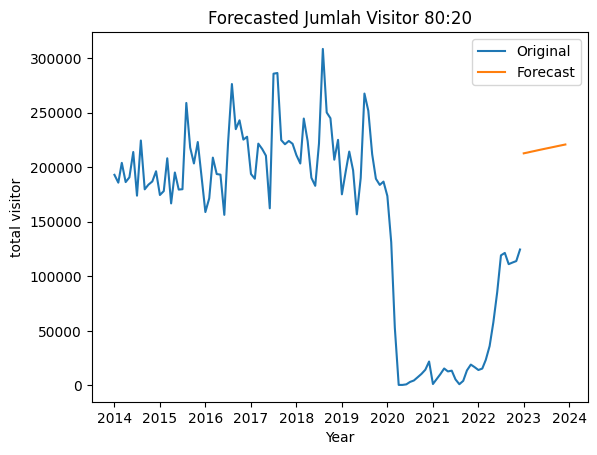

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future})
df_forecast['date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = data_original[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2014-01-01']

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Jumlah Visitor 80:20')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred_future))

In [ ]:
# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast LSTM scenario 1")
print(table)

Hasil Forecast LSTM scenario 1
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │       212731 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       213466 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       214198 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │       214946 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       215717 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       216462 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       217189 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       217914 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │       218654 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       219387 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       220120 │
├─────────────────────┼──────────

# Skenario 2 - 70:30

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/arvin0711/Kuliah-Predictive-Model-Analytics/main/Jakarta%202015%20-%202022.csv')
data_original2 = data2.copy()
train_datetime2 = pd.to_datetime(data2['datetime'])
data2 = data2.set_index('datetime')
data2

,total_visitor,total_accomodation
datetime,,
1/1/2014,193017,16332
2/1/2014,185851,17101
3/1/2014,204004,17438
4/1/2014,186373,17943
5/1/2014,190716,18123
...,...,...
8/1/2022,121438,68569
9/1/2022,111139,69382
10/1/2022,112588,69626


In [ ]:
#splitting data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, shuffle=False)

In [ ]:
#Display results
lengths = {
    'X_train2': len(X_train2),
    'y_train2': len(y_train2),
    'X_test2': len(X_test2),
    'y_test2': len(y_test2),
}

 #Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)


          Length
X_train2      75
y_train2      75
X_test2       33
y_test2       33


In [ ]:
# Define sequence length
sequence_length = 12

# Prepare training and testing data
X_train2, y_train2 = data_prep(X_train2, sequence_length)
X_test2, y_test2= data_prep(X_test2, sequence_length)

# Reshape the data for the RNN model
X_train2 = X_train2.reshape((X_train2.shape[0], X_train2.shape[1], 1))
X_test2 = X_test2.reshape((X_test2.shape[0], X_test2.shape[1], 1))

print('X_train.shape = ', X_train2.shape)
print('y_train.shape = ', y_train2.shape)
print('X_test.shape = ', X_test2.shape)
print('y_test.shape = ', y_test2.shape)

X_train.shape =  (63, 12, 1)
y_train.shape =  (63, 1)
X_test.shape =  (21, 12, 1)
y_test.shape =  (21, 1)


In [ ]:
# Build the LSTM model
model2 = Sequential()

# First LSTM layer
model2.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train2.shape[1], 1))) #

# Second LSTM layer
model2.add(LSTM(16, activation='tanh'))



# Output layer
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse')

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 16)                9280      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 75857 (296.32 KB)
Trainable params: 75857 (296.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=16, restore_best_weights=True)

# Train the model
history2 = model2.fit(
    X_train2, y_train2,
    epochs=25,
    batch_size=12,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping])

Epoch 1/25
5/5 [==============================] - 5s 263ms/step - loss: 0.0710 - val_loss: 0.0164
Epoch 2/25
5/5 [==============================] - 0s 31ms/step - loss: 0.0063 - val_loss: 0.0160
Epoch 3/25
5/5 [==============================] - 0s 26ms/step - loss: 0.0060 - val_loss: 0.0043
Epoch 4/25
5/5 [==============================] - 0s 25ms/step - loss: 0.0024 - val_loss: 0.0134
Epoch 5/25
5/5 [==============================] - 0s 32ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 6/25
5/5 [==============================] - 0s 30ms/step - loss: 7.7748e-04 - val_loss: 0.0025
Epoch 7/25
5/5 [==============================] - 0s 28ms/step - loss: 0.0011 - val_loss: 1.2235e-04
Epoch 8/25
5/5 [==============================] - 0s 26ms/step - loss: 2.3143e-04 - val_loss: 8.4206e-04
Epoch 9/25
5/5 [==============================] - 0s 29ms/step - loss: 5.1068e-04 - val_loss: 3.5546e-05
Epoch 10/25
5/5 [==============================] - 0s 28ms/step - loss: 1.9094e-04 - val_loss: 0.0012


In [ ]:
# Extract epoch information
epoch_info = pd.DataFrame({
    'Epoch': list(range(1, len(history2.history['loss']) + 1)),
    'Loss': history2.history['loss'],
    'Validation Loss': history.history['val_loss']
})

# Display the epoch information table
print("Epoch Information Table:")
print(epoch_info.to_markdown(index=False))


Epoch Information Table:
|   Epoch |        Loss |   Validation Loss |
|--------:|------------:|------------------:|
|       1 | 0.0710438   |       0.133208    |
|       2 | 0.00627723  |       0.0163511   |
|       3 | 0.00598741  |       0.00140281  |
|       4 | 0.0023737   |       0.0332023   |
|       5 | 0.002718    |       0.0265785   |
|       6 | 0.000777483 |       0.00324114  |
|       7 | 0.00105839  |       0.000173344 |
|       8 | 0.000231426 |       0.00120073  |
|       9 | 0.000510681 |       0.00454178  |
|      10 | 0.00019094  |       0.00162718  |
|      11 | 0.000161126 |       0.00011791  |
|      12 | 0.000161226 |       3.75577e-05 |
|      13 | 0.000145362 |       0.00044578  |
|      14 | 0.000134668 |       0.000126351 |
|      15 | 0.000137124 |       3.91806e-05 |
|      16 | 0.000115977 |       0.000183954 |
|      17 | 0.000104919 |       0.000389402 |
|      18 | 0.000104615 |       0.000134903 |
|      19 | 9.66657e-05 |       0.000240586 |
|      20

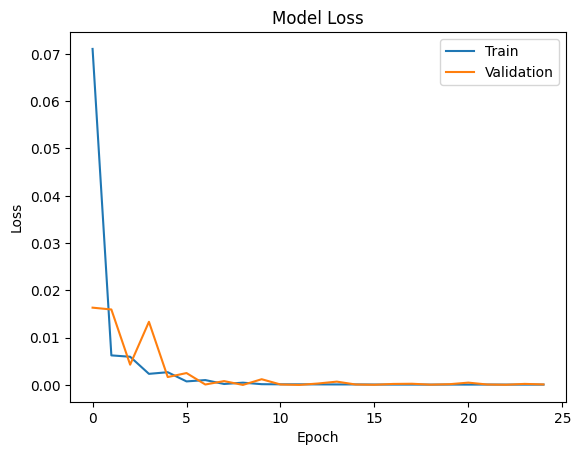

In [ ]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()

In [ ]:
# Forecasting untuk 12 bulan ke depan
n_past2 = 1
n_month_prediction2 = 12
predict_period_month2 = pd.date_range(list(train_datetime)[-n_past2], periods=n_month_prediction2, freq='M').tolist()
print(predict_period_month2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
LSTM_prediction2 = model2.predict(X_train2[-n_month_prediction2:])
mse2 = mean_squared_error(y_train2[-n_month_prediction2:], LSTM_prediction2)
fmape2 = np.mean(np.abs((mse2) / LSTM_prediction2)) * 100
mape2 = f"{(fmape2*100):.2f}%"
mae2 = np.mean(np.abs((mse2) / LSTM_prediction2))
r2_2 = r2_score(y_train2[-n_month_prediction2:], LSTM_prediction2)


print("MSE:", mse2)
print("MAPE:", mape2)
print("MAE:", mae2)
print("R-score:", r2_2)


1/1 [==============================] - 1s 833ms/step
MSE: 0.0001263676179965858
MAPE: 1.96%
MAE: 0.00019553541
R-score: 0.8951450254202525


In [ ]:
prediction_copies2 = np.repeat(LSTM_prediction2, data2.shape[1], axis=-1)
y_pred_future2 = scaler.inverse_transform(prediction_copies2)[:,0]

<ipython-input-39-82f1e076fdcd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original2['datetime'] = pd.to_datetime(original2['datetime'])


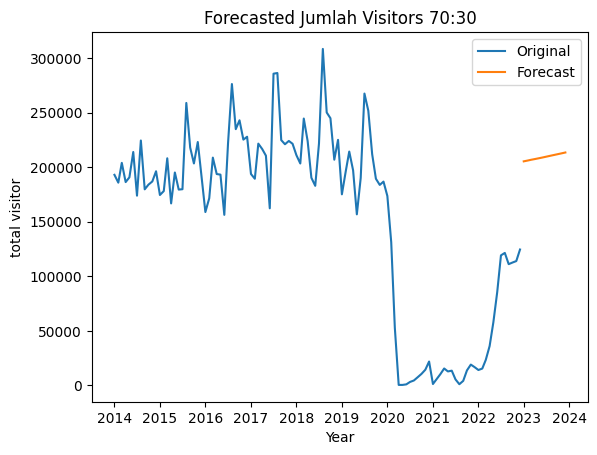

In [ ]:
forecast_dates2 = []

for time_i in predict_period_month2:
    forecast_dates2.append(time_i.date())

df_forecast2 = pd.DataFrame({'Date': forecast_dates2, 'total_visitor': y_pred_future2})
df_forecast2['date'] = pd.to_datetime(df_forecast2['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original2 = data_original2[['datetime', 'total_visitor']]
original2['datetime'] = pd.to_datetime(original2['datetime'])
original2 = original2.loc[original2['datetime'] >= '2014-01-01']

sns.lineplot(data=original2, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast2, x='date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Jumlah Visitors 70:30')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates2 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates2, y_pred_future2))

In [ ]:
# Create a list of forecast dates and prediction values
data2 = list(zip(forecast_dates2, y_pred_future2))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table2 = tabulate(data2, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast LSTM scenario 2")
print(table2)

Hasil Forecast LSTM scenario 2
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │       205384 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       206106 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       206814 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │       207493 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       208191 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       208923 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       209679 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       210458 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │       211222 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       211961 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       212726 │
├─────────────────────┼──────────

In [ ]:
data3 = pd.read_csv('https://raw.githubusercontent.com/arvin0711/Kuliah-Predictive-Model-Analytics/main/Jakarta%202015%20-%202022.csv')
data_original3 = data3.copy()
train_datetime3 = pd.to_datetime(data3['datetime'])
data3 = data3.set_index('datetime')
data3

,total_visitor,total_accomodation
datetime,,
1/1/2014,193017,16332
2/1/2014,185851,17101
3/1/2014,204004,17438
4/1/2014,186373,17943
5/1/2014,190716,18123
...,...,...
8/1/2022,121438,68569
9/1/2022,111139,69382
10/1/2022,112588,69626


# Skenario 3 - 60:40

In [ ]:
#splitting data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.4, shuffle=False)

In [ ]:
#Display results
lengths = {
    'X_train2': len(X_train3),
    'y_train2': len(y_train3),
    'X_test2': len(X_test3),
    'y_test2': len(y_test3),
}

 #Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)

          Length
X_train2      64
y_train2      64
X_test2       44
y_test2       44


In [ ]:
# Define sequence length
sequence_length = 12

# Prepare training and testing data
X_train3, y_train3 = data_prep(X_train3, sequence_length)
X_test3, y_test3= data_prep(X_test3, sequence_length)

# Reshape the data for the RNN model
X_train3 = X_train3.reshape((X_train3.shape[0], X_train3.shape[1], 1))
X_test3 = X_test3.reshape((X_test3.shape[0], X_test3.shape[1], 1))

print('X_train.shape = ', X_train3.shape)
print('y_train.shape = ', y_train3.shape)
print('X_test.shape = ', X_test3.shape)
print('y_test.shape = ', y_test3.shape)

X_train.shape =  (52, 12, 1)
y_train.shape =  (52, 1)
X_test.shape =  (32, 12, 1)
y_test.shape =  (32, 1)


In [ ]:
# Build the LSTM model
model3 = Sequential()

# First LSTM layer
model3.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train2.shape[1], 1))) #

# Second LSTM layer
model3.add(LSTM(16, activation='tanh'))



# Output layer
model3.add(Dense(1))

model3.compile(optimizer='adam', loss='mse')

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 128)           66560     
                                                                 
 lstm_7 (LSTM)               (None, 16)                9280      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 75857 (296.32 KB)
Trainable params: 75857 (296.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=16, restore_best_weights=True)

# Train the model
history3 = model3.fit(
    X_train3, y_train3,
    epochs=25,
    batch_size=12,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping])

Epoch 1/25
4/4 [==============================] - 6s 317ms/step - loss: 0.0694 - val_loss: 0.1012
Epoch 2/25
4/4 [==============================] - 0s 27ms/step - loss: 0.0139 - val_loss: 3.5605e-04
Epoch 3/25
4/4 [==============================] - 0s 26ms/step - loss: 0.0082 - val_loss: 0.0098
Epoch 4/25
4/4 [==============================] - 0s 30ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 5/25
4/4 [==============================] - 0s 29ms/step - loss: 0.0018 - val_loss: 0.0138
Epoch 6/25
4/4 [==============================] - 0s 29ms/step - loss: 0.0034 - val_loss: 0.0081
Epoch 7/25
4/4 [==============================] - 0s 29ms/step - loss: 0.0016 - val_loss: 5.8906e-04
Epoch 8/25
4/4 [==============================] - 0s 32ms/step - loss: 7.0474e-04 - val_loss: 0.0014
Epoch 9/25
4/4 [==============================] - 0s 29ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/25
4/4 [==============================] - 0s 27ms/step - loss: 3.7634e-04 - val_loss: 8.8446e-05
Epoch 11

In [ ]:
# Extract epoch information
epoch_info = pd.DataFrame({
    'Epoch': list(range(1, len(history3.history['loss']) + 1)),
    'Loss': history3.history['loss'],
    'Validation Loss': history.history['val_loss']
})

# Display the epoch information table
print("Epoch Information Table:")
print(epoch_info.to_markdown(index=False))


Epoch Information Table:
|   Epoch |        Loss |   Validation Loss |
|--------:|------------:|------------------:|
|       1 | 0.0693654   |       0.133208    |
|       2 | 0.013915    |       0.0163511   |
|       3 | 0.0082053   |       0.00140281  |
|       4 | 0.00479858  |       0.0332023   |
|       5 | 0.00183982  |       0.0265785   |
|       6 | 0.00341944  |       0.00324114  |
|       7 | 0.00155284  |       0.000173344 |
|       8 | 0.000704736 |       0.00120073  |
|       9 | 0.00115251  |       0.00454178  |
|      10 | 0.00037634  |       0.00162718  |
|      11 | 0.000362285 |       0.00011791  |
|      12 | 0.000327479 |       3.75577e-05 |
|      13 | 8.62563e-05 |       0.00044578  |
|      14 | 0.000146641 |       0.000126351 |
|      15 | 4.93498e-05 |       3.91806e-05 |
|      16 | 0.000108822 |       0.000183954 |
|      17 | 5.84547e-05 |       0.000389402 |
|      18 | 6.86232e-05 |       0.000134903 |
|      19 | 5.6756e-05  |       0.000240586 |
|      20

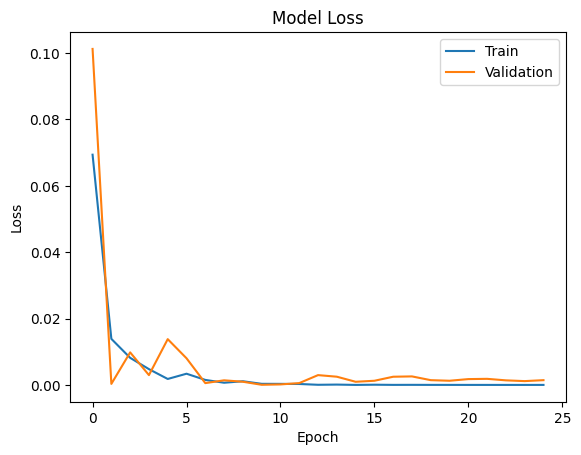

In [ ]:
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()

In [ ]:
# Forecasting untuk 12 bulan ke depan
n_past3 = 1
n_month_prediction3 = 12
predict_period_month3 = pd.date_range(list(train_datetime)[-n_past3], periods=n_month_prediction3, freq='M').tolist()
print(predict_period_month3)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
LSTM_prediction3 = model3.predict(X_train3[-n_month_prediction3:])
mse3 = mean_squared_error(y_train3[-n_month_prediction3:], LSTM_prediction3)
fmape3 = np.mean(np.abs((mse3) / LSTM_prediction3)) * 100
mape3 = f"{(fmape3*100):.2f}%"
mae3 = np.mean(np.abs((mse3) / LSTM_prediction3))
r2_3 = r2_score(y_train3[-n_month_prediction3:], LSTM_prediction3)

print("MSE:", mse3)
print("MAPE:", mape3)
print("MAE:", mae3)
print("R-score:", r2_3)

1/1 [==============================] - 1s 1s/step
MSE: 0.0013599395085895861
MAPE: 23.84%
MAE: 0.0023843886
R-score: -0.5380070049222583


In [ ]:
prediction_copies3 = np.repeat(LSTM_prediction3, data3.shape[1], axis=-1)
y_pred_future3 = scaler.inverse_transform(prediction_copies3)[:,0]

<ipython-input-65-4e7d83f930aa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original3['datetime'] = pd.to_datetime(original3['datetime'])


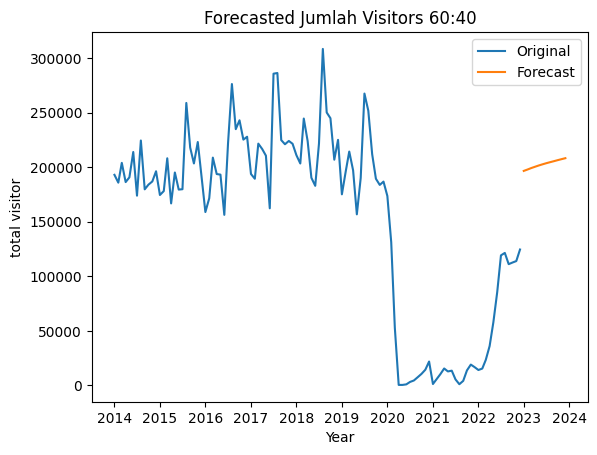

In [ ]:
forecast_dates3 = []

for time_i in predict_period_month3:
    forecast_dates3.append(time_i.date())

df_forecast3 = pd.DataFrame({'Date': forecast_dates3, 'total_visitor': y_pred_future3})
df_forecast3['date'] = pd.to_datetime(df_forecast3['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original3 = data_original3[['datetime', 'total_visitor']]
original3['datetime'] = pd.to_datetime(original3['datetime'])
original3 = original3.loc[original3['datetime'] >= '2014-01-01']

sns.lineplot(data=original3, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast3, x='date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('total visitor')
plt.title('Forecasted Jumlah Visitors 60:40')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates3 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data3 = list(zip(forecast_dates3, y_pred_future3))

In [ ]:
# Create a list of forecast dates and prediction values
data3 = list(zip(forecast_dates3, y_pred_future3))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table3 = tabulate(data3, headers=headers, tablefmt='fancy_grid')
# Print the table
print("Hasil Forecast LSTM scenario 3")
print(table3)

Hasil Forecast LSTM scenario 3
╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │       196617 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │       197912 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │       199175 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │       200404 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │       201574 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │       202667 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │       203676 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │       204630 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │       205558 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │       206492 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │       207407 │
├─────────────────────┼──────────

# Comparison Scenario

In [ ]:

# Define the data for each scenario
comparison_error = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'LSTM',
        'MAPE': mape,
        'MAE': mae,
        'MSE': mse,
        'R2': r2_1
    },
    {
        'Scenario': 'Scenario 2',
        'Model': 'LSTM',
        'MAPE': mape2,
        'MAE': mae2,
        'MSE': mse2,
        'R2': r2_2
    },
    {
        'Scenario': 'Scenario 3',
        'Model': 'LSTM',
        'MAPE': mape3,
        'MAE': mae3,
        'MSE': mse3,
        'R2': r2_3
    }
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(comparison_error)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)

╒════════════╤═════════╤════════╤═════════════╤═════════════╤═══════════╕
│ Scenario   │ Model   │ MAPE   │         MAE │         MSE │        R2 │
╞════════════╪═════════╪════════╪═════════════╪═════════════╪═══════════╡
│ Scenario 1 │ LSTM    │ 5.02%  │ 0.000501711 │ 0.000366802 │  0.69488  │
├────────────┼─────────┼────────┼─────────────┼─────────────┼───────────┤
│ Scenario 2 │ LSTM    │ 1.96%  │ 0.000195535 │ 0.000126368 │  0.895145 │
├────────────┼─────────┼────────┼─────────────┼─────────────┼───────────┤
│ Scenario 3 │ LSTM    │ 23.84% │ 0.00238439  │ 0.00135994  │ -0.538007 │
╘════════════╧═════════╧════════╧═════════════╧═════════════╧═══════════╛


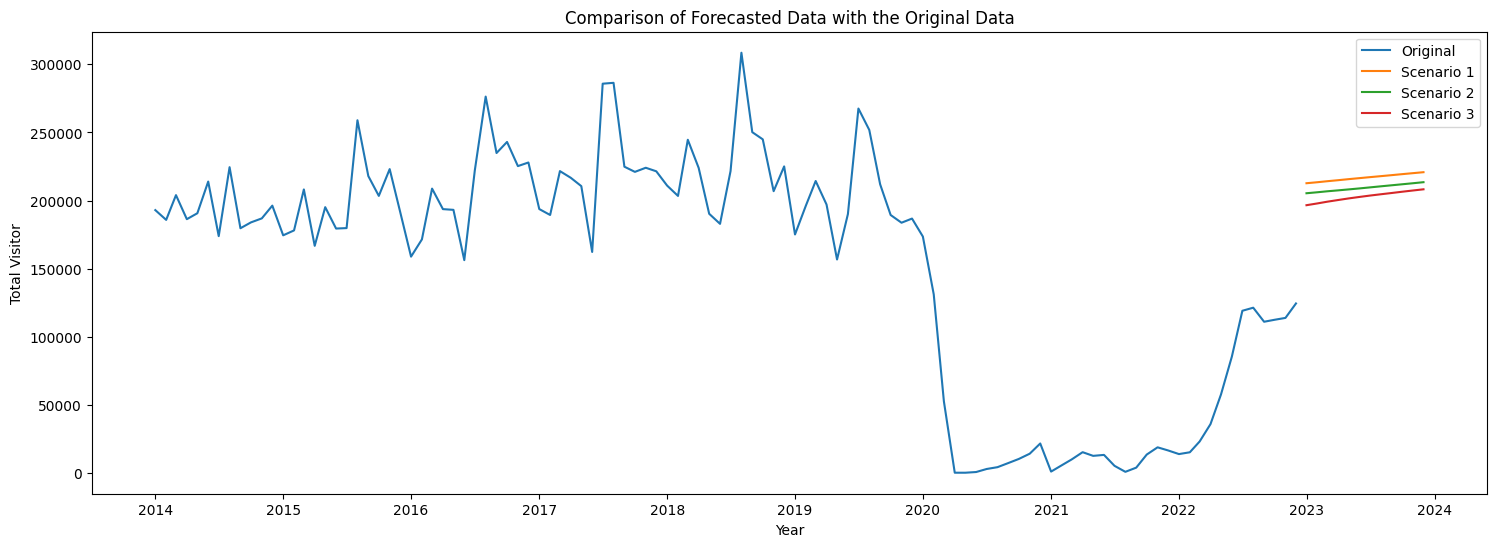

In [ ]:
# Plot the wider graph
plt.figure(figsize=(18, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='date', y='total_visitor', label='Scenario 1')
sns.lineplot(data=df_forecast2, x='date', y='total_visitor', label='Scenario 2')
sns.lineplot(data=df_forecast3, x='date', y='total_visitor', label='Scenario 3')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.title('Comparison of Forecasted Data with the Original Data')
plt.legend()
plt.show()